# 🖊 Handwritten Digit Recognizer using CNN (MNIST)

This project was built as part of my internship at **CodeC Technologies**.

## 🔍 Objective:
Train a CNN model to recognize handwritten digits (0–9) using the MNIST dataset. Also tested the model with a real handwritten digit image.

## 🛠 Tools Used:
- Python
- TensorFlow / Keras
- Google Colab
- Matplotlib, NumPy
- PIL / OpenCV for image preprocessing

## 📊 Outcome:
- Achieved over 98% accuracy on test data.
- Successfully predicted digit from uploaded custom image.




In [14]:
pip install numpy matplotlib tensorflow


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data to fit CNN input [samples, height, width, channels]
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.8997 - loss: 0.3249 - val_accuracy: 0.9844 - val_loss: 0.0502
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 34ms/step - accuracy: 0.9849 - loss: 0.0489 - val_accuracy: 0.9847 - val_loss: 0.0462
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9893 - loss: 0.0331 - val_accuracy: 0.9892 - val_loss: 0.0346
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9925 - loss: 0.0233 - val_accuracy: 0.9877 - val_loss: 0.0337
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9950 - loss: 0.0165 - val_accuracy: 0.9906 - val_loss: 0.0309


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9878 - loss: 0.0388
Test Accuracy: 0.9905999898910522


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


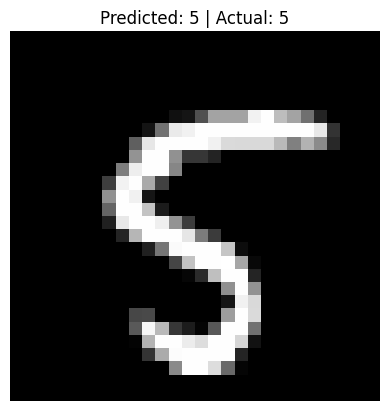

In [7]:
predictions = model.predict(x_test)

# Show a sample prediction
import random
i = random.randint(0, len(x_test) - 1)
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[i])} | Actual: {y_test[i]}")
plt.axis('off')
plt.show()


In [12]:
from google.colab import files
uploaded = files.upload()


Saving handwritten1.jpg to handwritten1.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


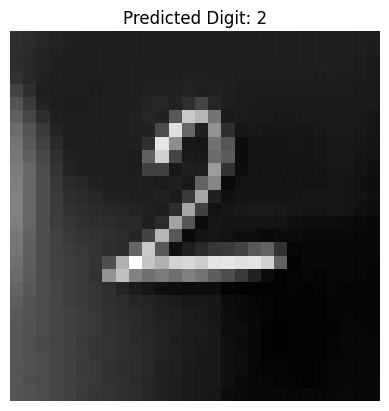

In [13]:
from PIL import Image
import cv2

# Load image
image_path = list(uploaded.keys())[0]  # Get uploaded filename
img = Image.open(image_path).convert('L')  # Convert to grayscale

# Resize to 28x28 pixels
img = img.resize((28, 28))

# Convert image to numpy array
img_array = np.array(img)

# Invert colors: MNIST is white digit on black bg
img_array = 255 - img_array

# Normalize and reshape for model
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

# Predict using the trained model
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Show result
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_class}")
plt.axis('off')
plt.show()
